## Optimization per Stadsdeel
The aim of this Notebook is to explore the possibiliy to optimize certain subsets of the problem and to reassamble these results to see whether or not this actually helps in obtaining a valid, improved solution. 

### Current situation
The process starts with the normal loading of the data, followed by a calculation of the average distance and penalties as a way to set a baseline. 

In [1]:
import requests
import pandas as pd
import geopandas as gpd

import sys

sys.path.append("../")

from Code.helper_functions import initial_loading, analyze_candidate_solution
from Code.algorithms import random_start_hillclimber
from Code.loading_data import create_all_households

POSTGRES password?WelkomCorne!


In [2]:
all_households, rel_poi_df, joined, df_afstandn2 = initial_loading()

Do you want to use addresses instead of clusters?True
What stadsdeel do you want to make as a subsection(optional parameter)?
What is the maximum amount of containers in a cluster that is considered to be useful?8
Where to get db files(local/online)?local
DB relation POIs loaded


..\Code\loading_data.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verblijfsobjecten['bag'] = verblijfsobjecten['split'].apply(lambda x: x[3])\
..\Code\loading_data.py:361: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ligtin_bag_pnd_identificatie'] = \
..\Code\loading_data.py:369: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

distance matrix loaded
API data loaded
Table all households created
API and DB joined
containers per cluster determined
move_rest determined


In [ ]:
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=False, use_count=True)

### Modification
This step consists of remvoving all information regarding the configuration of the containers in a certain stadsdeel, optimizing a copy of this and resetting it back into the initial solution to see its impact. The first optimization is done in stadsdeel Zuidoost (T), as it contains the least amount of garbage clusters

In [ ]:
joined_T = joined[joined['stadsdeel'] == 'T']

In [ ]:
all_households_T  = create_all_households(rel_poi_df, subsectie='T')
all_households_T = all_households_T.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

In [ ]:
hillclimber_df_T, best_solution_T = random_start_hillclimber(joined_T, all_households_T, rel_poi_df, df_afstandn2)

In [ ]:
# Join improved solution back with the rest and calculate score
joined_new = joined[joined['stadsdeel'] != 'T']
joined_new = joined_new.append(best_solution, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined_new, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

### Conclusion
This system of isolating certain stadsdelen appears to be working just fine and can be applied further to be used for multiple (clusters of) stadsdelen. The obvious places for optimization include Zuidoost (T), Noord (N), Nieuw-West(F) and the remaining cluster of Oost (M), Zuidoost(T), West(E) and Centrum(A). This is applied next

### Optimization of Zuid-Oost (T)

In [ ]:
joined_T = joined[joined['stadsdeel'] == 'T']
all_households_T  = create_all_households(rel_poi_df, subsectie='T')
all_households_T = all_households_T.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

In [ ]:
hillclimber_df_T, best_solution_T = random_start_hillclimber(joined_T, all_households_T, rel_poi_df, df_afstandn2)

In [ ]:
plt = hillclimber_df_T['best'].plot(title='hillclimber of Zuid-Oost')
plt.set_xlabel('Number of iterations')
plt.set_ylabel('Penalty score')
plt.figure.savefig('20200505_ZuidOost.pdf')

In [ ]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'] != 'T']
joined = joined.append(best_solution_T, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

### Optimization of Noord (N)

In [3]:
joined_N = joined[joined['stadsdeel'] == 'N']
all_households_N  = create_all_households(rel_poi_df, subsectie='N')
all_households_N = all_households_N.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

How many random iterations?5
How many iterations hillclimber?1000
Do you want the results saved(True/False)?True
Do you want to only use a subset of data?False
Do you want to use addresses over clusters?True
Do you want to apply simulated annealing? (True/False)False
Optimize on (score/penalties)?penalties
What method (2-opt, dim Gaussian, Gaussian)?Gaussian
Average distance is : 184.3575862531463
Penalties are: 122.06725198638458
Average distance is : 200.7231316550204
Penalties are: 136.66780721925585
Average distance is : 204.06287992501365
Penalties are: 141.63988158702395
Average distance is : 201.38717040285178
Penalties are: 138.61560598635046
Average distance is : 202.52638219577534
Penalties are: 129.37067482007558
Average distance is : 197.2124154970896
Penalties are: 132.98434565010373
***************************************
184.3575862531463 122.06725198638458 0
Average distance is : 184.3575862531463
Penalties are: 122.06725198638458
Amount of clusters to change: 25
Averag

Average distance is : 184.91772811093225
Penalties are: 117.56520217013025
117.56520217013025 117.30651376559543
Amount of clusters to change: 26
Average distance is : 184.77006096088303
Penalties are: 118.67287169574674
118.67287169574674 117.30651376559543
Amount of clusters to change: 19
Average distance is : 184.5518381778225
Penalties are: 117.47600240035405
117.47600240035405 117.30651376559543
Amount of clusters to change: 17
Average distance is : 185.05778756602206
Penalties are: 118.32001029660739
118.32001029660739 117.30651376559543
Amount of clusters to change: 26
Average distance is : 186.12430773234465
Penalties are: 117.91523044745341
117.91523044745341 117.30651376559543
Amount of clusters to change: 27
Average distance is : 184.34001143753096
Penalties are: 118.02881915820004
118.02881915820004 117.30651376559543
Amount of clusters to change: 16
Average distance is : 186.94662733029045
Penalties are: 117.77291230412142
117.77291230412142 117.30651376559543
Amount of cl

Average distance is : 186.10613823638144
Penalties are: 116.5834754020918
116.5834754020918 115.85873319985288
Amount of clusters to change: 22
Average distance is : 184.99538051474332
Penalties are: 116.17374356737997
116.17374356737997 115.85873319985288
Amount of clusters to change: 16
Average distance is : 184.4938007590277
Penalties are: 115.82277458272424
115.82277458272424 115.85873319985288
Amount of clusters to change: 18
Average distance is : 185.42430229532386
Penalties are: 118.08471069500288
118.08471069500288 115.82277458272424
Amount of clusters to change: 20
Average distance is : 184.84626861962263
Penalties are: 116.28713542656935
116.28713542656935 115.82277458272424
Amount of clusters to change: 19
Average distance is : 184.68525275166053
Penalties are: 116.18680584054022
116.18680584054022 115.82277458272424
Amount of clusters to change: 19
Average distance is : 184.74087130864794
Penalties are: 117.37773174181622
117.37773174181622 115.82277458272424
Amount of clus

Average distance is : 185.89172517985526
Penalties are: 113.7969708957194
113.7969708957194 112.90854665227232
Amount of clusters to change: 18
Average distance is : 185.6437963196014
Penalties are: 113.72573160917051
113.72573160917051 112.90854665227232
Amount of clusters to change: 16
Average distance is : 185.27235505244113
Penalties are: 113.3719872586272
113.3719872586272 112.90854665227232
Amount of clusters to change: 23
Average distance is : 184.93516219795097
Penalties are: 112.97827569833771
112.97827569833771 112.90854665227232
Amount of clusters to change: 7
Average distance is : 185.18206789052914
Penalties are: 112.95720502489156
112.95720502489156 112.90854665227232
Amount of clusters to change: 28
Average distance is : 184.90867990821476
Penalties are: 112.36680051734868
112.36680051734868 112.90854665227232
Amount of clusters to change: 20
Average distance is : 185.5451349338459
Penalties are: 113.1365198148218
113.1365198148218 112.36680051734868
Amount of clusters t

Average distance is : 185.5517770513543
Penalties are: 114.19954076079578
114.19954076079578 111.51752195040542
Amount of clusters to change: 30
Average distance is : 185.20790745791055
Penalties are: 112.2292760566894
112.2292760566894 111.51752195040542
Amount of clusters to change: 21
Average distance is : 185.51505674327694
Penalties are: 111.53603426447293
111.53603426447293 111.51752195040542
Amount of clusters to change: 11
Average distance is : 185.61477549694735
Penalties are: 112.08479318857249
112.08479318857249 111.51752195040542
Amount of clusters to change: 20
Average distance is : 185.64491064672768
Penalties are: 111.59974572543842
111.59974572543842 111.51752195040542
Amount of clusters to change: 24
Average distance is : 186.20784633885063
Penalties are: 111.98155577135584
111.98155577135584 111.51752195040542
Amount of clusters to change: 27
Average distance is : 186.64984729655663
Penalties are: 112.58214295841975
112.58214295841975 111.51752195040542
Amount of clus

Average distance is : 185.56302443840013
Penalties are: 111.33929209447481
111.33929209447481 111.2250043401848
Amount of clusters to change: 16
Average distance is : 185.31676876386848
Penalties are: 111.96420314180652
111.96420314180652 111.2250043401848
Amount of clusters to change: 14
Average distance is : 185.97342803943238
Penalties are: 111.90538416773524
111.90538416773524 111.2250043401848
Amount of clusters to change: 17
Average distance is : 187.05622748808102
Penalties are: 112.77273685885348
112.77273685885348 111.2250043401848
Amount of clusters to change: 15
Average distance is : 185.57055553747506
Penalties are: 111.50127835093342
111.50127835093342 111.2250043401848
Amount of clusters to change: 20
Average distance is : 185.76407594105675
Penalties are: 111.42553902582524
111.42553902582524 111.2250043401848
Amount of clusters to change: 25
Average distance is : 185.8722833155223
Penalties are: 111.48951075231001
111.48951075231001 111.2250043401848
Amount of clusters 

Average distance is : 191.41246171227934
Penalties are: 111.48662165557232
111.48662165557232 110.62874129209881
Amount of clusters to change: 22
Average distance is : 187.44581813374174
Penalties are: 110.93050836196493
110.93050836196493 110.62874129209881
Amount of clusters to change: 24
Average distance is : 187.58573159444794
Penalties are: 113.47842416782954
113.47842416782954 110.62874129209881
Amount of clusters to change: 25
Average distance is : 188.6778917450492
Penalties are: 111.30894570412974
111.30894570412974 110.62874129209881
Amount of clusters to change: 16
Average distance is : 187.59607234724814
Penalties are: 111.42992128879878
111.42992128879878 110.62874129209881
Amount of clusters to change: 12
Average distance is : 187.08819116974743
Penalties are: 111.66575609079766
111.66575609079766 110.62874129209881
Amount of clusters to change: 22
Average distance is : 186.9536045463005
Penalties are: 110.62311548227419
110.62311548227419 110.62874129209881
Amount of clu

Average distance is : 187.9623300407062
Penalties are: 110.43788073675972
110.43788073675972 109.60771761840108
Amount of clusters to change: 26
Average distance is : 188.35812191056692
Penalties are: 109.89891329920138
109.89891329920138 109.60771761840108
Amount of clusters to change: 20
Average distance is : 189.5898317004499
Penalties are: 113.03801262759409
113.03801262759409 109.60771761840108
Amount of clusters to change: 20
Average distance is : 190.4298654643943
Penalties are: 110.18717708718731
110.18717708718731 109.60771761840108
Amount of clusters to change: 20
Average distance is : 188.45078770999268
Penalties are: 110.96003328430402
110.96003328430402 109.60771761840108
Amount of clusters to change: 25
Average distance is : 188.4698017661555
Penalties are: 111.5236630793238
111.5236630793238 109.60771761840108
Amount of clusters to change: 29
Average distance is : 187.50715921688612
Penalties are: 111.77226707106422
111.77226707106422 109.60771761840108
Amount of cluster

Average distance is : 187.8685196325353
Penalties are: 109.76577905505425
109.76577905505425 109.52989851676895
Amount of clusters to change: 19
Average distance is : 189.05960829678105
Penalties are: 110.3013604413581
110.3013604413581 109.52989851676895
Amount of clusters to change: 18
Average distance is : 188.50629041555106
Penalties are: 110.51689038299438
110.51689038299438 109.52989851676895
Amount of clusters to change: 22
Average distance is : 189.03823194792403
Penalties are: 111.82265811039659
111.82265811039659 109.52989851676895
Amount of clusters to change: 24
Average distance is : 188.09938245308055
Penalties are: 110.72198830415145
110.72198830415145 109.52989851676895
Amount of clusters to change: 21
Average distance is : 188.33235233281118
Penalties are: 110.3932261171612
110.3932261171612 109.52989851676895
Amount of clusters to change: 16
Average distance is : 187.94511713355865
Penalties are: 110.20572980454277
110.20572980454277 109.52989851676895
Amount of cluste

Average distance is : 188.97670490848915
Penalties are: 111.07164633373878
111.07164633373878 109.33742783271576
Amount of clusters to change: 14
Average distance is : 187.16332920748374
Penalties are: 110.67564769960994
110.67564769960994 109.33742783271576
Amount of clusters to change: 21
Average distance is : 188.00839690841113
Penalties are: 110.04152695735391
110.04152695735391 109.33742783271576
Amount of clusters to change: 14
Average distance is : 187.4355066077172
Penalties are: 109.40461022977776
109.40461022977776 109.33742783271576
Amount of clusters to change: 18
Average distance is : 189.36700038109507
Penalties are: 111.56650849008571
111.56650849008571 109.33742783271576
Amount of clusters to change: 23
Average distance is : 188.0557217195902
Penalties are: 110.62254352209621
110.62254352209621 109.33742783271576
Amount of clusters to change: 19
Average distance is : 187.4946302341847
Penalties are: 110.69789274224723
110.69789274224723 109.33742783271576
Amount of clus

Average distance is : 189.47387821722702
Penalties are: 109.47361390084762
109.47361390084762 108.38968294534175
Amount of clusters to change: 22
Average distance is : 187.15066797364213
Penalties are: 108.56667375866262
108.56667375866262 108.38968294534175
Amount of clusters to change: 24
Average distance is : 186.91251438315743
Penalties are: 108.68488986347222
108.68488986347222 108.38968294534175
Amount of clusters to change: 16
Average distance is : 187.29870849122406
Penalties are: 108.51789859512157
108.51789859512157 108.38968294534175
Amount of clusters to change: 10
Average distance is : 187.2352103637451
Penalties are: 108.67938987082661
108.67938987082661 108.38968294534175
Amount of clusters to change: 15
Average distance is : 188.30591321514376
Penalties are: 109.146310236755
109.146310236755 108.38968294534175
Amount of clusters to change: 17
Average distance is : 187.57951173818773
Penalties are: 108.9831773248852
108.9831773248852 108.38968294534175
Amount of clusters

Average distance is : 187.67842921155605
Penalties are: 108.53874197691852
108.53874197691852 108.34876005176365
Amount of clusters to change: 24
Average distance is : 187.78562205110086
Penalties are: 108.93192206677416
108.93192206677416 108.34876005176365
Amount of clusters to change: 21
Average distance is : 187.1534067587356
Penalties are: 108.74140894596403
108.74140894596403 108.34876005176365
Amount of clusters to change: 27
Average distance is : 189.34146933947744
Penalties are: 111.17273013266201
111.17273013266201 108.34876005176365
Amount of clusters to change: 33
Average distance is : 188.93342395509634
Penalties are: 110.1652931136721
110.1652931136721 108.34876005176365
Amount of clusters to change: 23
Average distance is : 192.41081703112658
Penalties are: 112.02609370689899
112.02609370689899 108.34876005176365
Amount of clusters to change: 17
Average distance is : 187.17197916760756
Penalties are: 108.67165192223197
108.67165192223197 108.34876005176365
Amount of clus

Average distance is : 188.29245627933778
Penalties are: 111.20366753863415
111.20366753863415 108.08871315890211
Amount of clusters to change: 23
Average distance is : 187.87615944248375
Penalties are: 109.78030908107752
109.78030908107752 108.08871315890211
Amount of clusters to change: 13
Average distance is : 187.63157934333898
Penalties are: 108.28459833988629
108.28459833988629 108.08871315890211
Amount of clusters to change: 27
Average distance is : 188.55386819093454
Penalties are: 110.30369245759434
110.30369245759434 108.08871315890211
Amount of clusters to change: 19
Average distance is : 187.85581488204457
Penalties are: 108.76134788900518
108.76134788900518 108.08871315890211
Amount of clusters to change: 19
Average distance is : 187.4718849386808
Penalties are: 108.36510557378439
108.36510557378439 108.08871315890211
Amount of clusters to change: 12
Average distance is : 187.7982979008019
Penalties are: 108.81615245401144
108.81615245401144 108.08871315890211
Amount of clu

Average distance is : 187.15021400622174
Penalties are: 108.19816509267886
108.19816509267886 107.9057792519258
Amount of clusters to change: 16
Average distance is : 189.2599982660883
Penalties are: 108.65521077108025
108.65521077108025 107.9057792519258
Amount of clusters to change: 18
Average distance is : 187.62041477276608
Penalties are: 108.62433566835439
108.62433566835439 107.9057792519258
Amount of clusters to change: 18
Average distance is : 188.90610128927688
Penalties are: 110.77085737749742
110.77085737749742 107.9057792519258
Amount of clusters to change: 24
Average distance is : 187.7842713649891
Penalties are: 108.53768551457208
108.53768551457208 107.9057792519258
Amount of clusters to change: 20
Average distance is : 186.7778754409584
Penalties are: 111.33753941428824
111.33753941428824 107.9057792519258
Amount of clusters to change: 27
Average distance is : 187.3544945708288
Penalties are: 109.96138732648808
109.96138732648808 107.9057792519258
Amount of clusters to 

Average distance is : 187.4931378066767
Penalties are: 108.08420358683763
108.08420358683763 107.49699274146711
Amount of clusters to change: 20
Average distance is : 186.13976707252894
Penalties are: 107.85448074325855
107.85448074325855 107.49699274146711
Amount of clusters to change: 23
Average distance is : 188.93530941759457
Penalties are: 114.35047545061947
114.35047545061947 107.49699274146711
Amount of clusters to change: 13
Average distance is : 186.0511748738378
Penalties are: 107.92953788404242
107.92953788404242 107.49699274146711
Amount of clusters to change: 24
Average distance is : 187.30556284316543
Penalties are: 110.76359631878181
110.76359631878181 107.49699274146711
Amount of clusters to change: 21
Average distance is : 187.9357213516874
Penalties are: 109.05381220110131
109.05381220110131 107.49699274146711
Amount of clusters to change: 17
Average distance is : 185.97799795651903
Penalties are: 109.85490859905109
109.85490859905109 107.49699274146711
Amount of clus

Average distance is : 186.27501192223693
Penalties are: 107.55428999330567
107.55428999330567 107.26717527673013
Amount of clusters to change: 17
Average distance is : 186.89784451358702
Penalties are: 108.65765799962284
108.65765799962284 107.26717527673013
Amount of clusters to change: 18
Average distance is : 187.56950407284972
Penalties are: 108.25515192939584
108.25515192939584 107.26717527673013
Amount of clusters to change: 21
Average distance is : 185.70222070765354
Penalties are: 107.63150601848008
107.63150601848008 107.26717527673013
Amount of clusters to change: 18
Average distance is : 186.20044049358827
Penalties are: 108.93456386997927
108.93456386997927 107.26717527673013
Amount of clusters to change: 14
Average distance is : 186.12499447835395
Penalties are: 107.9597977016783
107.9597977016783 107.26717527673013
Amount of clusters to change: 19
Average distance is : 185.83623968039376
Penalties are: 108.6161808085989
108.6161808085989 107.26717527673013
Amount of clust

Average distance is : 186.64356818326914
Penalties are: 108.15004892335352
108.15004892335352 106.96058715724669
Amount of clusters to change: 20
Average distance is : 186.83477639160213
Penalties are: 110.17796526687879
110.17796526687879 106.96058715724669
Amount of clusters to change: 21
Average distance is : 185.49754524703187
Penalties are: 107.92620320687577
107.92620320687577 106.96058715724669
Amount of clusters to change: 21
Average distance is : 186.19022517243766
Penalties are: 107.38513552001353
107.38513552001353 106.96058715724669
Amount of clusters to change: 14
Average distance is : 186.85072033830477
Penalties are: 107.64691650638251
107.64691650638251 106.96058715724669
Amount of clusters to change: 16
Average distance is : 186.69579056230492
Penalties are: 108.4606326437723
108.4606326437723 106.96058715724669
Amount of clusters to change: 21
Average distance is : 185.8779433987996
Penalties are: 107.12051049723236
107.12051049723236 106.96058715724669
Amount of clus

Average distance is : 185.71900171860963
Penalties are: 107.21464064954625
107.21464064954625 106.96058715724669
Amount of clusters to change: 18
Average distance is : 187.8785209858278
Penalties are: 107.4583613100124
107.4583613100124 106.96058715724669
Amount of clusters to change: 24
Average distance is : 186.23433289628954
Penalties are: 108.1437055942272
108.1437055942272 106.96058715724669
Amount of clusters to change: 20
Average distance is : 185.6407809727512
Penalties are: 107.76724798320595
107.76724798320595 106.96058715724669
Amount of clusters to change: 18
Average distance is : 187.5193067912531
Penalties are: 107.2988398487216
107.2988398487216 106.96058715724669
Amount of clusters to change: 12
Average distance is : 187.0786586265059
Penalties are: 107.43713807254208
107.43713807254208 106.96058715724669
Amount of clusters to change: 16
Average distance is : 186.38874454339245
Penalties are: 108.13149627273411
108.13149627273411 106.96058715724669
Amount of clusters to

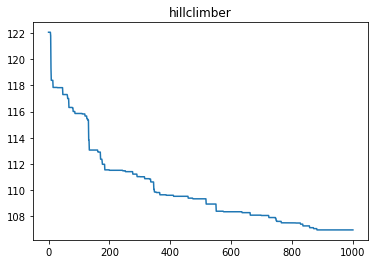

In [4]:
hillclimber_df_N, best_solution_N = random_start_hillclimber(joined_N, all_households_N, rel_poi_df, df_afstandn2)

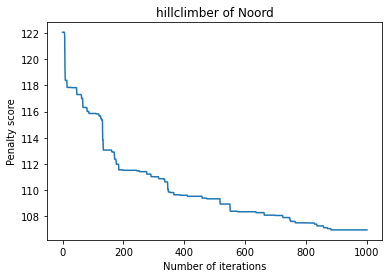

In [5]:
plt = hillclimber_df_N['best'].plot(title='hillclimber of Noord')
plt.set_xlabel('Number of iterations')
plt.set_ylabel('Penalty score')
plt.figure.savefig('20200505_Noord.pdf')

In [ ]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'] != 'N']
joined = joined.append(best_solution_N, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

### Optimization of Nieuw-West (F)

In [6]:
joined_F = joined[joined['stadsdeel'] == 'F']
all_households_F  = create_all_households(rel_poi_df, subsectie='F')
all_households_F = all_households_F.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

How many random iterations?5
How many iterations hillclimber?1000
Do you want the results saved(True/False)?True
Do you want to only use a subset of data?False
Do you want to use addresses over clusters?True
Do you want to apply simulated annealing? (True/False)False
Optimize on (score/penalties)?penalties
What method (2-opt, dim Gaussian, Gaussian)?Gaussian
Average distance is : 130.87220708268035
Penalties are: 104.43939436091863
Average distance is : 133.07540761327965
Penalties are: 109.54643035490339
Average distance is : 137.76347788310994
Penalties are: 107.02112148159314
Average distance is : 136.55959369628596
Penalties are: 110.65265723526028
Average distance is : 134.93350624433288
Penalties are: 111.09734997861422
Average distance is : 133.17635622811397
Penalties are: 107.92950799627005
***************************************
130.87220708268035 104.43939436091863 0
Average distance is : 130.87220708268035
Penalties are: 104.43939436091863
Amount of clusters to change: 32
A

Average distance is : 130.46722237042147
Penalties are: 100.98241424118734
100.98241424118734 100.52343733825082
Amount of clusters to change: 23
Average distance is : 130.10387140883557
Penalties are: 100.57950537559537
100.57950537559537 100.52343733825082
Amount of clusters to change: 34
Average distance is : 129.4794851015851
Penalties are: 100.35385114674828
100.35385114674828 100.52343733825082
Amount of clusters to change: 38
Average distance is : 129.90506419226705
Penalties are: 101.87261806029406
101.87261806029406 100.35385114674828
Amount of clusters to change: 29
Average distance is : 129.88673169630613
Penalties are: 100.85748355845418
100.85748355845418 100.35385114674828
Amount of clusters to change: 33
Average distance is : 129.08569041866696
Penalties are: 100.13311317707955
100.13311317707955 100.35385114674828
Amount of clusters to change: 34
Average distance is : 128.28063992755156
Penalties are: 100.43704732149938
100.43704732149938 100.13311317707955
Amount of cl

Average distance is : 129.74122957930905
Penalties are: 101.02402548325135
101.02402548325135 99.92078371156241
Amount of clusters to change: 44
Average distance is : 129.62282145250344
Penalties are: 100.3457577393363
100.3457577393363 99.92078371156241
Amount of clusters to change: 29
Average distance is : 129.54939639243267
Penalties are: 100.07585801433922
100.07585801433922 99.92078371156241
Amount of clusters to change: 38
Average distance is : 129.59132417409384
Penalties are: 100.44159730312859
100.44159730312859 99.92078371156241
Amount of clusters to change: 29
Average distance is : 128.74912100692018
Penalties are: 99.9798756909693
99.9798756909693 99.92078371156241
Amount of clusters to change: 32
Average distance is : 129.35448948922792
Penalties are: 101.18859239847225
101.18859239847225 99.92078371156241
Amount of clusters to change: 32
Average distance is : 129.1259307817256
Penalties are: 100.2968352641424
100.2968352641424 99.92078371156241
Amount of clusters to chang

Average distance is : 128.94578969253305
Penalties are: 98.11716351836236
98.11716351836236 97.4872406279001
Amount of clusters to change: 41
Average distance is : 128.34687697879346
Penalties are: 97.77749880556594
97.77749880556594 97.4872406279001
Amount of clusters to change: 36
Average distance is : 128.95126278984404
Penalties are: 98.22848340824953
98.22848340824953 97.4872406279001
Amount of clusters to change: 43
Average distance is : 128.5458302099911
Penalties are: 97.85635786994175
97.85635786994175 97.4872406279001
Amount of clusters to change: 42
Average distance is : 128.27901509572376
Penalties are: 97.48003362763767
97.48003362763767 97.4872406279001
Amount of clusters to change: 33
Average distance is : 128.6592138295909
Penalties are: 99.46006043475592
99.46006043475592 97.48003362763767
Amount of clusters to change: 37
Average distance is : 128.8603776458947
Penalties are: 98.7507105074572
98.7507105074572 97.48003362763767
Amount of clusters to change: 43
Average d

Average distance is : 128.36443126696153
Penalties are: 97.330553003032
97.330553003032 97.21823093891864
Amount of clusters to change: 39
Average distance is : 128.69258616931597
Penalties are: 98.70360155107238
98.70360155107238 97.21823093891864
Amount of clusters to change: 37
Average distance is : 128.35889133170923
Penalties are: 97.59914710389805
97.59914710389805 97.21823093891864
Amount of clusters to change: 20
Average distance is : 129.25480695148354
Penalties are: 98.80129258754027
98.80129258754027 97.21823093891864
Amount of clusters to change: 29
Average distance is : 129.31130388720456
Penalties are: 98.02939102423937
98.02939102423937 97.21823093891864
Amount of clusters to change: 32
Average distance is : 128.42413931889052
Penalties are: 97.06508968445857
97.06508968445857 97.21823093891864
Amount of clusters to change: 36
Average distance is : 128.801399098321
Penalties are: 98.01073356403799
98.01073356403799 97.06508968445857
Amount of clusters to change: 33
Avera

Average distance is : 128.14516996067712
Penalties are: 97.28907236759377
97.28907236759377 96.91294893002919
Amount of clusters to change: 27
Average distance is : 127.48355565905175
Penalties are: 96.89271569889831
96.89271569889831 96.91294893002919
Amount of clusters to change: 39
Average distance is : 127.32472631560199
Penalties are: 97.24503655819176
97.24503655819176 96.89271569889831
Amount of clusters to change: 27
Average distance is : 127.60038119815499
Penalties are: 97.27445709367969
97.27445709367969 96.89271569889831
Amount of clusters to change: 39
Average distance is : 127.7326666020757
Penalties are: 97.40174671096494
97.40174671096494 96.89271569889831
Amount of clusters to change: 32
Average distance is : 127.31852166993326
Penalties are: 97.46666166626649
97.46666166626649 96.89271569889831
Amount of clusters to change: 33
Average distance is : 127.94240239611507
Penalties are: 96.98665957205635
96.98665957205635 96.89271569889831
Amount of clusters to change: 26


Average distance is : 126.97354569511559
Penalties are: 97.448987280905
97.448987280905 96.45713169770337
Amount of clusters to change: 44
Average distance is : 126.69071447753333
Penalties are: 96.86365181490767
96.86365181490767 96.45713169770337
Amount of clusters to change: 38
Average distance is : 126.76854170294838
Penalties are: 96.6625496871388
96.6625496871388 96.45713169770337
Amount of clusters to change: 27
Average distance is : 127.22588800884614
Penalties are: 96.90604781187007
96.90604781187007 96.45713169770337
Amount of clusters to change: 31
Average distance is : 126.57199621813206
Penalties are: 96.66156818151869
96.66156818151869 96.45713169770337
Amount of clusters to change: 40
Average distance is : 126.65740404282997
Penalties are: 97.27190686094623
97.27190686094623 96.45713169770337
Amount of clusters to change: 51
Average distance is : 126.82338793380275
Penalties are: 97.6578881721937
97.6578881721937 96.45713169770337
Amount of clusters to change: 37
Average

Average distance is : 127.59454989732552
Penalties are: 95.91282781868232
95.91282781868232 95.76508891316608
Amount of clusters to change: 32
Average distance is : 127.68974503762686
Penalties are: 96.14344160076831
96.14344160076831 95.76508891316608
Amount of clusters to change: 25
Average distance is : 128.12136180420612
Penalties are: 96.13184705738487
96.13184705738487 95.76508891316608
Amount of clusters to change: 38
Average distance is : 127.34252561915895
Penalties are: 96.62030721819876
96.62030721819876 95.76508891316608
Amount of clusters to change: 35
Average distance is : 127.77722606208906
Penalties are: 97.03071054620888
97.03071054620888 95.76508891316608
Amount of clusters to change: 31
Average distance is : 127.45406527449607
Penalties are: 96.8021466150908
96.8021466150908 95.76508891316608
Amount of clusters to change: 33
Average distance is : 127.87205225144817
Penalties are: 96.34383623455376
96.34383623455376 95.76508891316608
Amount of clusters to change: 42
A

Average distance is : 127.99011275608851
Penalties are: 95.90698157005735
95.90698157005735 95.60073425782711
Amount of clusters to change: 27
Average distance is : 127.13335320188365
Penalties are: 95.65216954486317
95.65216954486317 95.60073425782711
Amount of clusters to change: 27
Average distance is : 127.55725817156565
Penalties are: 95.85999041007543
95.85999041007543 95.60073425782711
Amount of clusters to change: 37
Average distance is : 127.57863888896622
Penalties are: 95.62739369877545
95.62739369877545 95.60073425782711
Amount of clusters to change: 38
Average distance is : 127.58475082247234
Penalties are: 96.06966258843369
96.06966258843369 95.60073425782711
Amount of clusters to change: 31
Average distance is : 127.63894028719997
Penalties are: 96.46018498472826
96.46018498472826 95.60073425782711
Amount of clusters to change: 32
Average distance is : 127.35491310242556
Penalties are: 96.12158780801724
96.12158780801724 95.60073425782711
Amount of clusters to change: 33

Average distance is : 126.76623950217387
Penalties are: 95.85570356292124
95.85570356292124 95.22775759125354
Amount of clusters to change: 34
Average distance is : 126.14380943672327
Penalties are: 95.7488084601511
95.7488084601511 95.22775759125354
Amount of clusters to change: 31
Average distance is : 126.97639035822554
Penalties are: 96.07553318439436
96.07553318439436 95.22775759125354
Amount of clusters to change: 24
Average distance is : 126.77887010676092
Penalties are: 96.07349582336155
96.07349582336155 95.22775759125354
Amount of clusters to change: 33
Average distance is : 127.03313088761809
Penalties are: 95.46222065710346
95.46222065710346 95.22775759125354
Amount of clusters to change: 27
Average distance is : 126.57078478703414
Penalties are: 95.88808858606613
95.88808858606613 95.22775759125354
Amount of clusters to change: 22
Average distance is : 126.94517674970976
Penalties are: 95.3806011786877
95.3806011786877 95.22775759125354
Amount of clusters to change: 37
Ave

Average distance is : 127.66447321764781
Penalties are: 96.2749799490756
96.2749799490756 94.89805457761224
Amount of clusters to change: 27
Average distance is : 127.01057472600897
Penalties are: 95.43577627531563
95.43577627531563 94.89805457761224
Amount of clusters to change: 26
Average distance is : 127.3140202313382
Penalties are: 95.40710739230215
95.40710739230215 94.89805457761224
Amount of clusters to change: 36
Average distance is : 126.92532770135237
Penalties are: 95.13559923462634
95.13559923462634 94.89805457761224
Amount of clusters to change: 36
Average distance is : 126.84252391323601
Penalties are: 95.30181444890529
95.30181444890529 94.89805457761224
Amount of clusters to change: 28
Average distance is : 126.93501161521114
Penalties are: 95.41814651279533
95.41814651279533 94.89805457761224
Amount of clusters to change: 33
Average distance is : 126.94117657325494
Penalties are: 95.37546691114473
95.37546691114473 94.89805457761224
Amount of clusters to change: 28
Av

Average distance is : 125.8015989768665
Penalties are: 94.95463357179949
94.95463357179949 94.73187865631056
Amount of clusters to change: 29
Average distance is : 125.69222053630924
Penalties are: 94.8930349054939
94.8930349054939 94.73187865631056
Amount of clusters to change: 35
Average distance is : 125.86005656866502
Penalties are: 95.44865453562196
95.44865453562196 94.73187865631056
Amount of clusters to change: 39
Average distance is : 125.71936458598704
Penalties are: 95.09283194104606
95.09283194104606 94.73187865631056
Amount of clusters to change: 26
Average distance is : 125.92391753122314
Penalties are: 95.00084186761887
95.00084186761887 94.73187865631056
Amount of clusters to change: 29
Average distance is : 125.64216581657513
Penalties are: 94.89089531188056
94.89089531188056 94.73187865631056
Amount of clusters to change: 37
Average distance is : 125.52556474538291
Penalties are: 94.7515870938472
94.7515870938472 94.73187865631056
Amount of clusters to change: 39
Aver

Average distance is : 125.54068849110766
Penalties are: 95.16812422599935
95.16812422599935 94.73109354494133
Amount of clusters to change: 43
Average distance is : 126.68743910554531
Penalties are: 95.08864388350057
95.08864388350057 94.73109354494133
Amount of clusters to change: 29
Average distance is : 125.68965707233116
Penalties are: 95.3038868607787
95.3038868607787 94.73109354494133
Amount of clusters to change: 23
Average distance is : 125.80091953703936
Penalties are: 94.79569398851967
94.79569398851967 94.73109354494133
Amount of clusters to change: 40
Average distance is : 125.984900483051
Penalties are: 95.68977473356823
95.68977473356823 94.73109354494133
Amount of clusters to change: 42
Average distance is : 125.84054249903436
Penalties are: 95.67498117371808
95.67498117371808 94.73109354494133
Amount of clusters to change: 31
Average distance is : 126.32470402968616
Penalties are: 95.24887214767912
95.24887214767912 94.73109354494133
Amount of clusters to change: 42
Ave

Average distance is : 126.42430491823242
Penalties are: 95.12960333242131
95.12960333242131 94.64050207165151
Amount of clusters to change: 27
Average distance is : 126.049545287412
Penalties are: 94.80279897185198
94.80279897185198 94.64050207165151
Amount of clusters to change: 30
Average distance is : 126.04890138878079
Penalties are: 94.58365896710572
94.58365896710572 94.64050207165151
Amount of clusters to change: 31
Average distance is : 126.02184795300914
Penalties are: 94.59537138277616
94.59537138277616 94.58365896710572
Amount of clusters to change: 30
Average distance is : 126.16573768929712
Penalties are: 94.76593038483658
94.76593038483658 94.58365896710572
Amount of clusters to change: 34
Average distance is : 126.67114842942235
Penalties are: 95.01386171629747
95.01386171629747 94.58365896710572
Amount of clusters to change: 31
Average distance is : 125.57064297498673
Penalties are: 94.31784383239619
94.31784383239619 94.58365896710572
Amount of clusters to change: 23
A

Average distance is : 126.88421456249351
Penalties are: 94.66676961516771
94.66676961516771 93.97302091031933
Amount of clusters to change: 28
Average distance is : 126.55418207250193
Penalties are: 94.39441538832213
94.39441538832213 93.97302091031933
Amount of clusters to change: 32
Average distance is : 126.71890931459794
Penalties are: 94.3567656982763
94.3567656982763 93.97302091031933
Amount of clusters to change: 32
Average distance is : 128.06993473019486
Penalties are: 100.70870148896373
100.70870148896373 93.97302091031933
Amount of clusters to change: 31
Average distance is : 126.81786536889653
Penalties are: 94.24719783305693
94.24719783305693 93.97302091031933
Amount of clusters to change: 26
Average distance is : 126.70017311037353
Penalties are: 94.62027958562963
94.62027958562963 93.97302091031933
Amount of clusters to change: 33
Average distance is : 126.38578959971173
Penalties are: 94.15871019224863
94.15871019224863 93.97302091031933
Amount of clusters to change: 31

Average distance is : 125.9176051161998
Penalties are: 93.91361653617433
93.91361653617433 93.83015891652846
Amount of clusters to change: 28
Average distance is : 126.58008258575146
Penalties are: 94.80178917974662
94.80178917974662 93.83015891652846
Amount of clusters to change: 43
Average distance is : 126.79856100092348
Penalties are: 93.86697159209565
93.86697159209565 93.83015891652846
Amount of clusters to change: 22
Average distance is : 126.31113651218637
Penalties are: 94.59485843425968
94.59485843425968 93.83015891652846
Amount of clusters to change: 35
Average distance is : 126.01002513854873
Penalties are: 93.8386655786723
93.8386655786723 93.83015891652846
Amount of clusters to change: 27
Average distance is : 126.98685544209906
Penalties are: 93.91881798627514
93.91881798627514 93.83015891652846
Amount of clusters to change: 28
Average distance is : 126.06372565485498
Penalties are: 94.06030658385961
94.06030658385961 93.83015891652846
Amount of clusters to change: 36
Av

Average distance is : 125.30621124343635
Penalties are: 94.05615761663064
94.05615761663064 93.528873696389
Amount of clusters to change: 33
Average distance is : 125.0396641151269
Penalties are: 93.89912928762475
93.89912928762475 93.528873696389
Amount of clusters to change: 35
Average distance is : 125.1931127863359
Penalties are: 93.74841902513248
93.74841902513248 93.528873696389
Amount of clusters to change: 36
Average distance is : 125.44165556936233
Penalties are: 93.95086187228839
93.95086187228839 93.528873696389
Amount of clusters to change: 32
Average distance is : 124.97127721683226
Penalties are: 93.81449219547605
93.81449219547605 93.528873696389
Amount of clusters to change: 33
Average distance is : 125.30861901337381
Penalties are: 93.8383585488383
93.8383585488383 93.528873696389
Amount of clusters to change: 36
Average distance is : 125.07801127359275
Penalties are: 93.66474290008992
93.66474290008992 93.528873696389
Amount of clusters to change: 35
Average distance 

Average distance is : 123.64670099487711
Penalties are: 93.59710241226429
93.59710241226429 93.18926846093282
Amount of clusters to change: 42
Average distance is : 123.31905252675638
Penalties are: 93.05492149132553
93.05492149132553 93.18926846093282
Amount of clusters to change: 29
Average distance is : 123.52450368006348
Penalties are: 93.05689020364176
93.05689020364176 93.05492149132553
Amount of clusters to change: 34
Average distance is : 123.09680765488051
Penalties are: 93.0929183212816
93.0929183212816 93.05492149132553
Amount of clusters to change: 34
Average distance is : 122.90462203063295
Penalties are: 93.40643431673637
93.40643431673637 93.05492149132553
Amount of clusters to change: 28
Average distance is : 123.36080664251378
Penalties are: 93.7042079789937
93.7042079789937 93.05492149132553
Amount of clusters to change: 31
Average distance is : 123.48937280273879
Penalties are: 93.92254550636835
93.92254550636835 93.05492149132553
Amount of clusters to change: 32
Ave

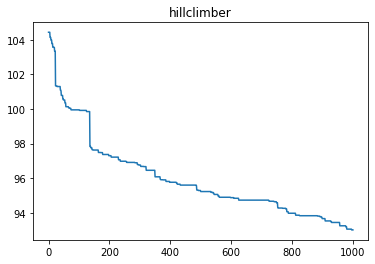

In [8]:
hillclimber_df_F, best_solution_F = random_start_hillclimber(joined_F, all_households_F, rel_poi_df, df_afstandn2)

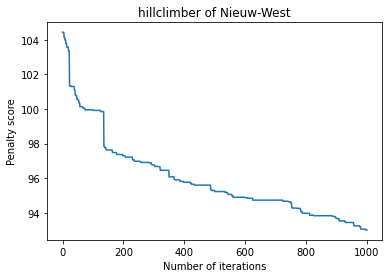

In [9]:
plt = hillclimber_df_F['best'].plot(title='hillclimber of Nieuw-West')
plt.set_xlabel('Number of iterations')
plt.set_ylabel('Penalty score')
plt.figure.savefig('20200505_NieuwWest.pdf')

In [10]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'] != 'F']
joined = joined.append(best_solution_F, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

Average distance is : 136.786252810162
Penalties are: 106.25491417557554


### Optimization of "Centrum"

In [11]:
joined_C = joined[joined['stadsdeel'].isin(['M', 'A', 'K', 'E'])]
all_households_C = create_all_households(rel_poi_df, subsectie = ['M', 'A', 'K', 'E'])
all_households_C = all_households_C.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

How many random iterations?5
How many iterations hillclimber?1000
Do you want the results saved(True/False)?True
Do you want to only use a subset of data?False
Do you want to use addresses over clusters?True
Do you want to apply simulated annealing? (True/False)False
Optimize on (score/penalties)?penalties
What method (2-opt, dim Gaussian, Gaussian)?Gaussian
Average distance is : 119.79225947176442
Penalties are: 97.41333320714261
Average distance is : 123.47090943803161
Penalties are: 100.13908558381273
Average distance is : 122.74850771449512
Penalties are: 99.71343500201536
Average distance is : 124.08212967094374
Penalties are: 101.0046171708846
Average distance is : 123.59687794221392
Penalties are: 100.37134632234007
Average distance is : 122.91963959211104
Penalties are: 100.75661103780705
***************************************
119.79225947176442 97.41333320714261 0
Average distance is : 119.79225947176442
Penalties are: 97.41333320714261
Amount of clusters to change: 86
Averag

Average distance is : 119.97958064077179
Penalties are: 95.56597417828695
95.56597417828695 95.47640014196404
Amount of clusters to change: 81
Average distance is : 120.15137378871881
Penalties are: 95.87440515291816
95.87440515291816 95.47640014196404
Amount of clusters to change: 83
Average distance is : 120.21187120060718
Penalties are: 96.02295541393606
96.02295541393606 95.47640014196404
Amount of clusters to change: 107
Average distance is : 119.91975738201691
Penalties are: 95.96345238074942
95.96345238074942 95.47640014196404
Amount of clusters to change: 96
Average distance is : 119.81126461015823
Penalties are: 95.43509095829464
95.43509095829464 95.47640014196404
Amount of clusters to change: 89
Average distance is : 119.75435304009646
Penalties are: 95.46907552566994
95.46907552566994 95.43509095829464
Amount of clusters to change: 92
Average distance is : 119.86705307371406
Penalties are: 95.5596736111369
95.5596736111369 95.43509095829464
Amount of clusters to change: 87


Average distance is : 119.62560984149565
Penalties are: 94.06601514250431
94.06601514250431 93.87743517138348
Amount of clusters to change: 98
Average distance is : 119.71595607499678
Penalties are: 93.80276434902521
93.80276434902521 93.87743517138348
Amount of clusters to change: 91
Average distance is : 120.48873306030073
Penalties are: 95.64965795191283
95.64965795191283 93.80276434902521
Amount of clusters to change: 97
Average distance is : 119.62933793960408
Penalties are: 93.73811960488469
93.73811960488469 93.80276434902521
Amount of clusters to change: 86
Average distance is : 119.72856072827886
Penalties are: 94.04917589437602
94.04917589437602 93.73811960488469
Amount of clusters to change: 88
Average distance is : 119.56019838685027
Penalties are: 93.9142040213506
93.9142040213506 93.73811960488469
Amount of clusters to change: 85
Average distance is : 119.11018635274198
Penalties are: 93.57815453959626
93.57815453959626 93.73811960488469
Amount of clusters to change: 80
A

Average distance is : 119.27110215186828
Penalties are: 93.1849904308687
93.1849904308687 92.96841868972987
Amount of clusters to change: 84
Average distance is : 119.12320133218174
Penalties are: 94.11706820740694
94.11706820740694 92.96841868972987
Amount of clusters to change: 106
Average distance is : 119.09483424569413
Penalties are: 93.11457335760207
93.11457335760207 92.96841868972987
Amount of clusters to change: 96
Average distance is : 119.57089756317431
Penalties are: 93.33094725371194
93.33094725371194 92.96841868972987
Amount of clusters to change: 83
Average distance is : 119.1911776437124
Penalties are: 92.83984459439012
92.83984459439012 92.96841868972987
Amount of clusters to change: 112
Average distance is : 119.22600829726478
Penalties are: 93.10452651735424
93.10452651735424 92.83984459439012
Amount of clusters to change: 91
Average distance is : 118.87424106614107
Penalties are: 93.45420467282915
93.45420467282915 92.83984459439012
Amount of clusters to change: 87


Average distance is : 119.41779228508287
Penalties are: 93.21841147836899
93.21841147836899 92.83984459439012
Amount of clusters to change: 101
Average distance is : 119.38562567607532
Penalties are: 93.76204580602047
93.76204580602047 92.83984459439012
Amount of clusters to change: 79
Average distance is : 119.21051620396088
Penalties are: 92.85026204546364
92.85026204546364 92.83984459439012
Amount of clusters to change: 85
Average distance is : 119.17095793572351
Penalties are: 93.01644361773289
93.01644361773289 92.83984459439012
Amount of clusters to change: 92
Average distance is : 119.7979268504787
Penalties are: 93.3424896011065
93.3424896011065 92.83984459439012
Amount of clusters to change: 97
Average distance is : 119.27605293551642
Penalties are: 93.04203988396624
93.04203988396624 92.83984459439012
Amount of clusters to change: 102
Average distance is : 119.77222028638701
Penalties are: 93.08181970400418
93.08181970400418 92.83984459439012
Amount of clusters to change: 89


Average distance is : 118.75398501638621
Penalties are: 92.54092927866853
92.54092927866853 92.48993829959655
Amount of clusters to change: 97
Average distance is : 119.32585224170359
Penalties are: 92.89272556079368
92.89272556079368 92.48993829959655
Amount of clusters to change: 95
Average distance is : 118.95170323560114
Penalties are: 92.50969550255213
92.50969550255213 92.48993829959655
Amount of clusters to change: 94
Average distance is : 119.15998886044962
Penalties are: 93.09184701128336
93.09184701128336 92.48993829959655
Amount of clusters to change: 94
Average distance is : 119.16888064806325
Penalties are: 92.63754044137302
92.63754044137302 92.48993829959655
Amount of clusters to change: 95
Average distance is : 119.16871297195222
Penalties are: 92.67991128516364
92.67991128516364 92.48993829959655
Amount of clusters to change: 108
Average distance is : 119.13763422180001
Penalties are: 92.85553770596734
92.85553770596734 92.48993829959655
Amount of clusters to change: 1

Average distance is : 119.21457931122751
Penalties are: 92.5514996701958
92.5514996701958 92.28766815171328
Amount of clusters to change: 98
Average distance is : 119.22497322167492
Penalties are: 93.02557925001203
93.02557925001203 92.28766815171328
Amount of clusters to change: 88
Average distance is : 118.90087724182919
Penalties are: 93.31907799923339
93.31907799923339 92.28766815171328
Amount of clusters to change: 97
Average distance is : 119.19691319349603
Penalties are: 92.63265593190567
92.63265593190567 92.28766815171328
Amount of clusters to change: 85
Average distance is : 119.0003896096644
Penalties are: 92.29923053436947
92.29923053436947 92.28766815171328
Amount of clusters to change: 88
Average distance is : 119.28433321334603
Penalties are: 92.44908670584097
92.44908670584097 92.28766815171328
Amount of clusters to change: 101
Average distance is : 118.87111440968957
Penalties are: 92.48122563575218
92.48122563575218 92.28766815171328
Amount of clusters to change: 95
A

Average distance is : 118.8288981937965
Penalties are: 91.48785519717084
91.48785519717084 91.63245977591941
Amount of clusters to change: 95
Average distance is : 118.85909524112488
Penalties are: 91.64599402374515
91.64599402374515 91.48785519717084
Amount of clusters to change: 84
Average distance is : 118.93616875933415
Penalties are: 91.90019994667048
91.90019994667048 91.48785519717084
Amount of clusters to change: 92
Average distance is : 118.89512625942606
Penalties are: 91.62447774661854
91.62447774661854 91.48785519717084
Amount of clusters to change: 93
Average distance is : 118.56505721691892
Penalties are: 91.47522077295102
91.47522077295102 91.48785519717084
Amount of clusters to change: 92
Average distance is : 118.74443579456177
Penalties are: 91.7179876765502
91.7179876765502 91.47522077295102
Amount of clusters to change: 98
Average distance is : 118.64080057183732
Penalties are: 91.99790713291725
91.99790713291725 91.47522077295102
Amount of clusters to change: 98
Av

Average distance is : 119.10529363127307
Penalties are: 92.61711925498038
92.61711925498038 91.25601155543892
Amount of clusters to change: 86
Average distance is : 118.978521963075
Penalties are: 91.58074497864304
91.58074497864304 91.25601155543892
Amount of clusters to change: 85
Average distance is : 118.75172797800413
Penalties are: 91.39925002884422
91.39925002884422 91.25601155543892
Amount of clusters to change: 85
Average distance is : 119.1182391359907
Penalties are: 91.74582008092578
91.74582008092578 91.25601155543892
Amount of clusters to change: 82
Average distance is : 118.6912311237589
Penalties are: 91.43791935001332
91.43791935001332 91.25601155543892
Amount of clusters to change: 86
Average distance is : 118.99694035827949
Penalties are: 91.81184849348965
91.81184849348965 91.25601155543892
Amount of clusters to change: 81
Average distance is : 119.44231556570524
Penalties are: 92.20218210848186
92.20218210848186 91.25601155543892
Amount of clusters to change: 84
Ave

Average distance is : 118.68341252907047
Penalties are: 91.63166264705589
91.63166264705589 91.15289940347706
Amount of clusters to change: 93
Average distance is : 118.54873701380721
Penalties are: 91.41126781124385
91.41126781124385 91.15289940347706
Amount of clusters to change: 89
Average distance is : 118.7605698044697
Penalties are: 91.32227484919439
91.32227484919439 91.15289940347706
Amount of clusters to change: 88
Average distance is : 118.5475412325399
Penalties are: 91.44940291923386
91.44940291923386 91.15289940347706
Amount of clusters to change: 92
Average distance is : 118.55891713160597
Penalties are: 91.55563752856457
91.55563752856457 91.15289940347706
Amount of clusters to change: 86
Average distance is : 118.25795173495928
Penalties are: 91.0469011137887
91.0469011137887 91.15289940347706
Amount of clusters to change: 101
Average distance is : 118.36951445240747
Penalties are: 91.9731927037274
91.9731927037274 91.0469011137887
Amount of clusters to change: 78
Avera

Average distance is : 118.24498990706314
Penalties are: 90.98661338068636
90.98661338068636 90.93929164234596
Amount of clusters to change: 86
Average distance is : 118.135685458725
Penalties are: 91.38996156346765
91.38996156346765 90.93929164234596
Amount of clusters to change: 81
Average distance is : 118.04167447075277
Penalties are: 90.91647684025011
90.91647684025011 90.93929164234596
Amount of clusters to change: 93
Average distance is : 118.55129268291422
Penalties are: 92.00365245331128
92.00365245331128 90.91647684025011
Amount of clusters to change: 88
Average distance is : 118.1361834878107
Penalties are: 91.35738149333952
91.35738149333952 90.91647684025011
Amount of clusters to change: 103
Average distance is : 118.20691898812554
Penalties are: 91.3119549444535
91.3119549444535 90.91647684025011
Amount of clusters to change: 94
Average distance is : 118.10213912752681
Penalties are: 91.17835644063729
91.17835644063729 90.91647684025011
Amount of clusters to change: 105
Av

Average distance is : 118.52812444894884
Penalties are: 91.44884687476353
91.44884687476353 90.85393441131473
Amount of clusters to change: 85
Average distance is : 118.43783804002659
Penalties are: 91.16327184080181
91.16327184080181 90.85393441131473
Amount of clusters to change: 85
Average distance is : 117.87181147281973
Penalties are: 91.02754344731613
91.02754344731613 90.85393441131473
Amount of clusters to change: 83
Average distance is : 118.41525589024552
Penalties are: 91.01888778818669
91.01888778818669 90.85393441131473
Amount of clusters to change: 92
Average distance is : 118.5112140814451
Penalties are: 91.00467620898782
91.00467620898782 90.85393441131473
Amount of clusters to change: 85
Average distance is : 118.50304995141444
Penalties are: 91.42962544908822
91.42962544908822 90.85393441131473
Amount of clusters to change: 91
Average distance is : 118.36371806473542
Penalties are: 90.92308018925658
90.92308018925658 90.85393441131473
Amount of clusters to change: 102

Average distance is : 118.44719202018447
Penalties are: 91.31332898413608
91.31332898413608 90.73761892745127
Amount of clusters to change: 68
Average distance is : 118.16964687683671
Penalties are: 90.9046199109052
90.9046199109052 90.73761892745127
Amount of clusters to change: 75
Average distance is : 118.16975890943736
Penalties are: 90.95663094939462
90.95663094939462 90.73761892745127
Amount of clusters to change: 89
Average distance is : 118.06568410174488
Penalties are: 90.73423871530017
90.73423871530017 90.73761892745127
Amount of clusters to change: 96
Average distance is : 118.26316509302256
Penalties are: 91.31784541986603
91.31784541986603 90.73423871530017
Amount of clusters to change: 89
Average distance is : 118.06122414014705
Penalties are: 90.92015226219384
90.92015226219384 90.73423871530017
Amount of clusters to change: 88
Average distance is : 118.1037623550186
Penalties are: 91.52871864836128
91.52871864836128 90.73423871530017
Amount of clusters to change: 90
Av

Average distance is : 117.67929062830686
Penalties are: 91.21567803987513
91.21567803987513 90.46625071964962
Amount of clusters to change: 89
Average distance is : 117.695767263467
Penalties are: 90.5058739415084
90.5058739415084 90.46625071964962
Amount of clusters to change: 95
Average distance is : 117.44155353635823
Penalties are: 90.29006293479458
90.29006293479458 90.46625071964962
Amount of clusters to change: 92
Average distance is : 117.59020745599396
Penalties are: 90.44377081798393
90.44377081798393 90.29006293479458
Amount of clusters to change: 98
Average distance is : 117.91921730647826
Penalties are: 90.85562448636179
90.85562448636179 90.29006293479458
Amount of clusters to change: 91
Average distance is : 117.71842731615125
Penalties are: 90.61857698889771
90.61857698889771 90.29006293479458
Amount of clusters to change: 91
Average distance is : 117.72653185228639
Penalties are: 90.45756983672754
90.45756983672754 90.29006293479458
Amount of clusters to change: 100
Av

Average distance is : 117.27247638212083
Penalties are: 90.40763920090195
90.40763920090195 90.20729374695439
Amount of clusters to change: 77
Average distance is : 117.57393974498132
Penalties are: 90.34406104282978
90.34406104282978 90.20729374695439
Amount of clusters to change: 77
Average distance is : 117.806264444477
Penalties are: 90.86995498728423
90.86995498728423 90.20729374695439
Amount of clusters to change: 85
Average distance is : 117.47568789255055
Penalties are: 90.3709597892637
90.3709597892637 90.20729374695439
Amount of clusters to change: 101
Average distance is : 117.5844102429641
Penalties are: 90.74401663028046
90.74401663028046 90.20729374695439
Amount of clusters to change: 87
Average distance is : 117.23602594398575
Penalties are: 90.16525671134686
90.16525671134686 90.20729374695439
Amount of clusters to change: 99
Average distance is : 117.44190525690361
Penalties are: 90.89057380356708
90.89057380356708 90.16525671134686
Amount of clusters to change: 94
Ave

Average distance is : 117.30466363362342
Penalties are: 90.13746589847213
90.13746589847213 90.00295307799351
Amount of clusters to change: 85
Average distance is : 117.78057537289034
Penalties are: 91.21029667929872
91.21029667929872 90.00295307799351
Amount of clusters to change: 84
Average distance is : 117.92766878733256
Penalties are: 90.91332005904506
90.91332005904506 90.00295307799351
Amount of clusters to change: 75
Average distance is : 117.43028717854762
Penalties are: 90.51653328990369
90.51653328990369 90.00295307799351
Amount of clusters to change: 95
Average distance is : 117.29011454013953
Penalties are: 90.0694516965753
90.0694516965753 90.00295307799351
Amount of clusters to change: 99
Average distance is : 117.4261201468577
Penalties are: 90.2821973301648
90.2821973301648 90.00295307799351
Amount of clusters to change: 95
Average distance is : 117.6810448055694
Penalties are: 90.70813287323949
90.70813287323949 90.00295307799351
Amount of clusters to change: 90
Avera

Average distance is : 117.80920574186517
Penalties are: 90.89572243371836
90.89572243371836 89.84783729068654
Amount of clusters to change: 93
Average distance is : 117.6068909585719
Penalties are: 90.26177367267015
90.26177367267015 89.84783729068654
Amount of clusters to change: 87
Average distance is : 117.66623154251421
Penalties are: 90.24140853214344
90.24140853214344 89.84783729068654
Amount of clusters to change: 85
Average distance is : 117.35813279912117
Penalties are: 90.45397190914014
90.45397190914014 89.84783729068654
Amount of clusters to change: 84
Average distance is : 117.50226430598475
Penalties are: 89.99342298355957
89.99342298355957 89.84783729068654
Amount of clusters to change: 104
Average distance is : 118.01871628879516
Penalties are: 90.8091691723954
90.8091691723954 89.84783729068654
Amount of clusters to change: 68
Average distance is : 117.5264988633277
Penalties are: 89.98654166219202
89.98654166219202 89.84783729068654
Amount of clusters to change: 97
Av

Average distance is : 117.658207072685
Penalties are: 90.33673135165765
90.33673135165765 89.78824725509214
Amount of clusters to change: 89
Average distance is : 117.64155173435773
Penalties are: 90.27953408419887
90.27953408419887 89.78824725509214
Amount of clusters to change: 92
Average distance is : 117.25000521028234
Penalties are: 90.16991563190575
90.16991563190575 89.78824725509214
Amount of clusters to change: 110
Average distance is : 117.37550263364477
Penalties are: 89.94271590948935
89.94271590948935 89.78824725509214
Amount of clusters to change: 77
Average distance is : 117.3550231354501
Penalties are: 89.94675366346023
89.94675366346023 89.78824725509214
Amount of clusters to change: 103
Average distance is : 117.40305415786752
Penalties are: 89.85347423620404
89.85347423620404 89.78824725509214
Amount of clusters to change: 111
Average distance is : 117.47410445540591
Penalties are: 89.90083386566275
89.90083386566275 89.78824725509214
Amount of clusters to change: 89

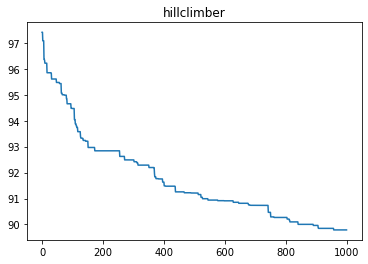

In [12]:
hillclimber_df_C, best_solution_C = random_start_hillclimber(joined_C, all_households_C, rel_poi_df, df_afstandn2)

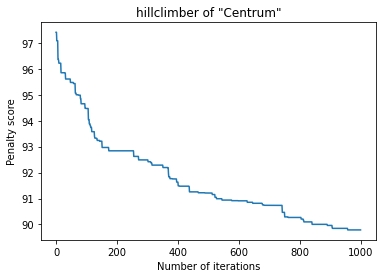

In [13]:
plt = hillclimber_df_C['best'].plot(title='hillclimber of "Centrum"')
plt.set_xlabel('Number of iterations')
plt.set_ylabel('Penalty score')
plt.figure.savefig('20200507_Centrum.pdf')

In [14]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'].isin(['T', 'N', 'F'])]
joined = joined.append(best_solution_C, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

Average distance is : 135.3699303085496
Penalties are: 101.8919720314485


In [ ]:
lst = [295.12, 286.96, 271.81, 258.44, 232.13]
pd.DataFrame(lst).plot()

### Conclusion
Preliminary results show that optimization for the different stadsdelen proves to be efficient and working. A new step is to compare the initial results of the current situation with the final score and to see what makes the difference. Another thing to investigate is the huge performance optimization of the Zuidoost part

In [ ]:
# joined_total = joined_start.set_index('s1_afv_nodes').join(joined.set_index('s1_afv_nodes'), rsuffix='_new', lsuffix='_old')
# joined_total['rest_difference'] = -(joined_total['rest_new'] - joined_total['rest_old'])
# joined_total['plastic_difference'] = -(joined_total['plastic_new'] - joined_total['plastic_old'])
# joined_total['paper_difference'] = -(joined_total['papier_new'] - joined_total['papier_old'])
# joined_total['glass_difference'] = -(joined_total['glas_new'] - joined_total['glas_old'])
# joined_total['textile_difference'] = -(joined_total['textiel_new'] - joined_total['textiel_old'])
# # joined_total[['rest_difference', 'plastic_difference', 'paper_difference', 'glass_difference', 'textile_difference', 'totaal_new']]
# tmp = joined_total[(joined_total['totaal_old'] > 10)][['cluster_x_old', 'cluster_y_old', 'rest_old', 'rest_new', 'totaal_old', 'totaal_new', 'stadsdeel_old']]
# print(tmp['stadsdeel_old'].value_counts())
# joined_total.sum()

### Calculation of lower and upper bounds

In [ ]:
# Lower bound
joined_cluster_distance = joined.set_index('s1_afv_nodes').join(df_afstandn2.set_index('van_s1_afv_nodes')).reset_index().rename(columns={'index': 'van_s1_afv_nodes'})
joined_cluster_distance = joined_cluster_distance.sort_values(by='afstand')
pivot = joined_cluster_distance.groupby('naar_s1_afv_nodes').first()
lower_bound = (pivot['afstand'] * pivot['count']).sum() / pivot['count'].sum()
lower_bound